# 1. Carga de los Datos:

In [1]:
import inflect
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
import pandas as pd
import numpy as np
import sys
import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.metrics import ConfusionMatrixDisplay
import spacy
from joblib import dump, load

from preprocesamiento import prep 


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jorgi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jorgi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jorgi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jorgi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jorgi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jorgi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]    

# Pipe Line

In [4]:
from sklearn.pipeline import Pipeline, FunctionTransformer
entrevistasODS = pd.read_excel('./data/ODScat_345.xlsx')
X_data, y_data = entrevistasODS['Textos_espanol'], entrevistasODS['sdg']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
# Crear el pipeline
pipe = Pipeline([
    ('limpieza', FunctionTransformer(prep, validate=False)),
    ('Agrupacion', CountVectorizer()),
    ('Regresion', SVC(kernel="linear", probability=True))
])
pipe.fit(X_train, y_train).score(X_test, y_test)

0.974485596707819

              precision    recall  f1-score   support

           3       0.97      0.98      0.98       372
           4       0.97      0.97      0.97       402
           5       0.98      0.98      0.98       441

    accuracy                           0.97      1215
   macro avg       0.97      0.97      0.97      1215
weighted avg       0.97      0.97      0.97      1215

[[5.93570930e-12 9.99999467e-01 5.33136497e-07]
 [9.99864180e-01 1.37702305e-06 1.34442887e-04]
 [9.51801753e-01 4.51197663e-02 3.07848065e-03]
 ...
 [1.73616726e-03 9.97997435e-01 2.66397723e-04]
 [8.74752538e-02 5.21833550e-03 9.07306411e-01]
 [1.86059745e-06 1.02165499e-06 9.99997118e-01]]


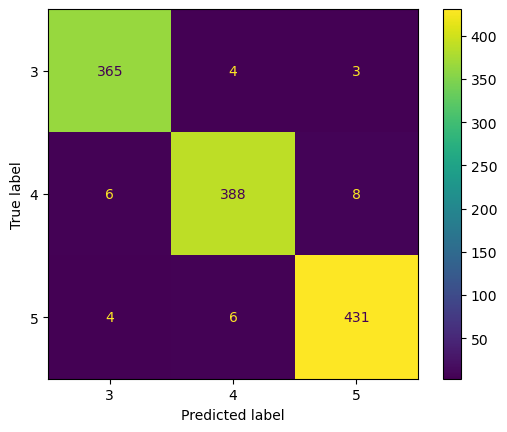

In [5]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
probabilities = pipe.predict_proba(X_test)
print(probabilities)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [6]:
dump(pipe, 'modelo_Proyecto1.joblib', compress=3)
print("Modelo guardado exitosamente.")

Modelo guardado exitosamente.
